# Uso de algoritmo de Mini KMeans


## Import libraries

In [ ]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import make_classification

## Load dataset

El dataset utilizado se llama "clean_train.csv", el cual proviene de la ejecución del notebook "02 - preprocesado".

In [ ]:
drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/MyDrive/ProyectoModelos1/data")

Mounted at /content/drive


In [ ]:
df= pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Drop unused columns

In [ ]:
df = df.drop(columns=['ESTU_PRIVADO_LIBERTAD', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEINTERNET.1'])
df_test = df_test.drop(columns=['ESTU_PRIVADO_LIBERTAD', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEINTERNET.1'])


In [ ]:
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,No,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,No,Si,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,No,No,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,No,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,No,Si,Primaria completa,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,No,Si,Secundaria (Bachillerato) incompleta,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Si,Si,Primaria completa,bajo


## Fill Null values and replace punctuation marks

In [ ]:
# Condiciones socioeconómicas
df['ESTU_VALORMATRICULAUNIVERSIDAD'] = df['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna(df['ESTU_VALORMATRICULAUNIVERSIDAD'].mode().iloc[0])
df['ESTU_HORASSEMANATRABAJA'] = df['ESTU_HORASSEMANATRABAJA'].fillna(0)
df['ESTU_PAGOMATRICULAPROPIO'] = df['ESTU_PAGOMATRICULAPROPIO'].fillna('No')
df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].fillna('No responde')

# Reemplazo de palabras
def reemplazar_letra(palabra,letra,letraSinAcento):
  return palabra.replace(letra,letraSinAcento)

df['ESTU_PRGM_ACADEMICO'] = df['ESTU_PRGM_ACADEMICO'].apply(lambda x: reemplazar_letra(x,'Á','A'))
df['ESTU_PRGM_ACADEMICO'] = df['ESTU_PRGM_ACADEMICO'].apply(lambda x: reemplazar_letra(x,'É','E'))
df['ESTU_PRGM_ACADEMICO'] = df['ESTU_PRGM_ACADEMICO'].apply(lambda x: reemplazar_letra(x,'Í','I'))
df['ESTU_PRGM_ACADEMICO'] = df['ESTU_PRGM_ACADEMICO'].apply(lambda x: reemplazar_letra(x,'Ó','O'))
df['ESTU_PRGM_ACADEMICO'] = df['ESTU_PRGM_ACADEMICO'].apply(lambda x: reemplazar_letra(x,'Ú','U'))

# Acceso a recursos informáticos
df['FAMI_TIENEINTERNET'] = df['FAMI_TIENEINTERNET'].fillna('No')
df['FAMI_TIENECOMPUTADOR'] = df['FAMI_TIENECOMPUTADOR'].fillna('No')

# Educación familia
df['FAMI_EDUCACIONPADRE'] = df['FAMI_EDUCACIONPADRE'].fillna('No sabe')
df['FAMI_EDUCACIONMADRE'] = df['FAMI_EDUCACIONMADRE'].fillna('No sabe')



### Now on the test dataset

In [ ]:
# Condiciones socioeconómicas
df_test['ESTU_VALORMATRICULAUNIVERSIDAD'] = df_test['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna(df['ESTU_VALORMATRICULAUNIVERSIDAD'].mode().iloc[0])
df_test['ESTU_HORASSEMANATRABAJA'] = df_test['ESTU_HORASSEMANATRABAJA'].fillna(0)
df_test['ESTU_PAGOMATRICULAPROPIO'] = df_test['ESTU_PAGOMATRICULAPROPIO'].fillna('No')
df_test['FAMI_ESTRATOVIVIENDA'] = df_test['FAMI_ESTRATOVIVIENDA'].fillna('No responde')

# Reemplazo de palabras
def reemplazar_letra(palabra,letra,letraSinAcento):
  return palabra.replace(letra,letraSinAcento)

df_test['ESTU_PRGM_ACADEMICO'] = df_test['ESTU_PRGM_ACADEMICO'].apply(lambda x: reemplazar_letra(x,'Á','A'))
df_test['ESTU_PRGM_ACADEMICO'] = df_test['ESTU_PRGM_ACADEMICO'].apply(lambda x: reemplazar_letra(x,'É','E'))
df_test['ESTU_PRGM_ACADEMICO'] = df_test['ESTU_PRGM_ACADEMICO'].apply(lambda x: reemplazar_letra(x,'Í','I'))
df_test['ESTU_PRGM_ACADEMICO'] = df_test['ESTU_PRGM_ACADEMICO'].apply(lambda x: reemplazar_letra(x,'Ó','O'))
df_test['ESTU_PRGM_ACADEMICO'] = df_test['ESTU_PRGM_ACADEMICO'].apply(lambda x: reemplazar_letra(x,'Ú','U'))

# Acceso a recursos informáticos
df_test['FAMI_TIENEINTERNET'] = df_test['FAMI_TIENEINTERNET'].fillna('No')
df_test['FAMI_TIENECOMPUTADOR'] = df_test['FAMI_TIENECOMPUTADOR'].fillna('No')

# Educación familia
df_test['FAMI_EDUCACIONPADRE'] = df_test['FAMI_EDUCACIONPADRE'].fillna('No sabe')
df_test['FAMI_EDUCACIONMADRE'] = df_test['FAMI_EDUCACIONMADRE'].fillna('No sabe')



## Label encode feature variables


In [ ]:
# Se puede realizar de manera manual para las columnas que correspondan

# Educación de padres
encoder = LabelEncoder()
df["FAMI_EDUCACIONPADRE"] = encoder.fit_transform(df["FAMI_EDUCACIONPADRE"])
df["FAMI_EDUCACIONMADRE"] = encoder.fit_transform(df["FAMI_EDUCACIONMADRE"])

In [ ]:
# Estrato socioeconómico de la familia
encoder = LabelEncoder()
df['FAMI_ESTRATOVIVIENDA'] = encoder.fit_transform(df['FAMI_ESTRATOVIVIENDA'])

In [ ]:
# Departamento
encoder = LabelEncoder()
df['ESTU_PRGM_DEPARTAMENTO'] = encoder.fit_transform(df['ESTU_PRGM_DEPARTAMENTO'])

In [ ]:
# Programa académico, como son demasiados preferimos no utilizar one-hot encoding. Para evitar crear demasiadas columnas y perder eficiencia
encoder = LabelEncoder()
df['ESTU_PRGM_ACADEMICO'] = encoder.fit_transform(df['ESTU_PRGM_ACADEMICO'])


### Now for the test dataset

In [ ]:
# Se puede realizar de manera manual para las columnas que correspondan

# Educación de padres
encoder = LabelEncoder()
df_test["FAMI_EDUCACIONPADRE"] = encoder.fit_transform(df_test["FAMI_EDUCACIONPADRE"])
df_test["FAMI_EDUCACIONMADRE"] = encoder.fit_transform(df_test["FAMI_EDUCACIONMADRE"])

In [ ]:
# Estrato socioeconómico de la familia
encoder = LabelEncoder()
df_test['FAMI_ESTRATOVIVIENDA'] = encoder.fit_transform(df_test['FAMI_ESTRATOVIVIENDA'])

In [ ]:
# Departamento
encoder = LabelEncoder()
df_test['ESTU_PRGM_DEPARTAMENTO'] = encoder.fit_transform(df_test['ESTU_PRGM_DEPARTAMENTO'])

In [ ]:
# Programa académico, como son demasiados preferimos no utilizar one-hot encoding. Para evitar crear demasiadas columnas y perder eficiencia
encoder = LabelEncoder()
df_test['ESTU_PRGM_ACADEMICO'] = encoder.fit_transform(df_test['ESTU_PRGM_ACADEMICO'])

## One-hot encoding

In [ ]:
df = pd.get_dummies(df, columns=['ESTU_PAGOMATRICULAPROPIO', 'ESTU_HORASSEMANATRABAJA', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'ESTU_VALORMATRICULAUNIVERSIDAD'])
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,...,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón,ESTU_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,ESTU_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_No pagó matrícula
0,904256,20212,252,4,2,11,5,medio-alto,True,False,...,False,True,False,False,False,True,False,False,False,False
1,645256,20212,205,3,2,10,11,bajo,True,False,...,True,False,False,True,False,False,False,False,False,False
2,308367,20203,679,4,2,8,8,bajo,True,False,...,False,True,False,True,False,False,False,False,False,False
3,470353,20195,17,26,3,4,8,alto,True,False,...,False,True,False,False,True,False,False,False,False,False
4,989032,20212,757,1,2,6,6,medio-bajo,True,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,114,17,1,8,9,medio-alto,False,True,...,False,True,False,False,False,False,True,False,False,False
692496,754213,20212,757,21,2,7,9,bajo,True,False,...,False,True,False,True,False,False,False,False,False,False
692497,504185,20183,55,4,2,8,9,medio-bajo,False,True,...,False,True,True,False,False,False,False,False,False,False
692498,986620,20195,757,28,0,6,6,bajo,False,True,...,True,False,False,True,False,False,False,False,False,False


### One-hot for the test dataset

In [ ]:
df_test = pd.get_dummies(df_test, columns=['ESTU_PAGOMATRICULAPROPIO', 'ESTU_HORASSEMANATRABAJA', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'ESTU_VALORMATRICULAUNIVERSIDAD'])
df_test

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,ESTU_HORASSEMANATRABAJA_0,...,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón,ESTU_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,ESTU_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_No pagó matrícula
0,550236,20183,763,5,2,10,6,False,True,False,...,False,True,False,False,False,False,False,True,False,False
1,98545,20203,14,1,1,8,10,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,499179,20212,399,4,2,9,8,True,False,False,...,False,True,True,False,False,False,False,False,False,False
3,782980,20195,189,27,0,7,7,True,False,False,...,True,False,True,False,False,False,False,False,False,False
4,785185,20212,18,3,1,8,8,True,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,496981,20195,18,4,0,7,7,False,True,False,...,False,True,False,True,False,False,False,False,False,False
296782,209415,20183,204,19,3,0,0,True,False,False,...,False,True,True,False,False,False,False,False,False,False
296783,239074,20212,204,4,2,8,0,True,False,False,...,False,True,False,True,False,False,False,False,False,False
296784,963852,20195,307,1,2,0,0,True,False,False,...,False,True,False,False,False,True,False,False,False,False


## Separate the dataset into X and y. Where y is the target variable(label encode it)

In [ ]:
mapeo = {
    'bajo': 0,
    'medio-bajo': 1,
    'medio-alto': 2,
    'alto': 3
}

# Aplicar el mapeo a la columna
df['RENDIMIENTO_GLOBAL'] = df['RENDIMIENTO_GLOBAL'].map(mapeo)
y_train = df["RENDIMIENTO_GLOBAL"]
X_train = df.drop("RENDIMIENTO_GLOBAL", axis=1)


In [ ]:

X_test = df_test

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train and use the model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

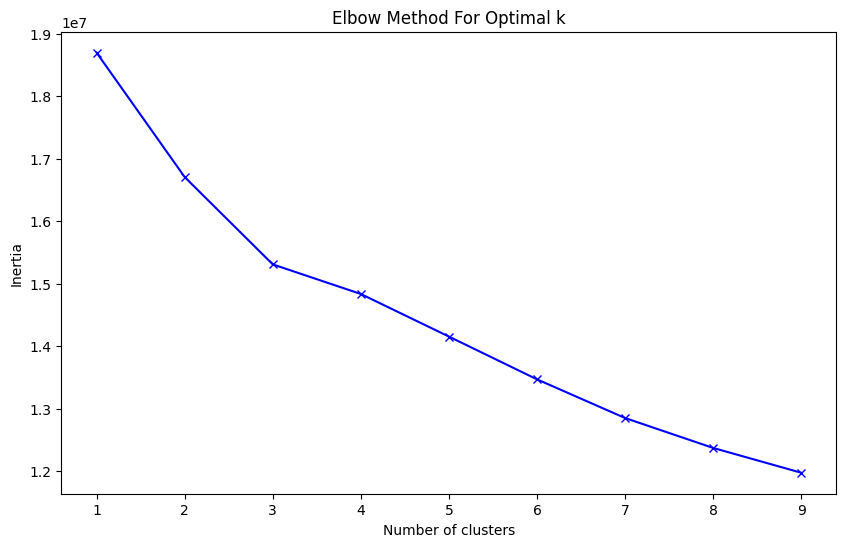

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Calculate inertia for different numbers of clusters
inertia = []
K = range(1, 10)
for k in K:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)


# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n_clusters = 3

model = MiniBatchKMeans(n_clusters=n_clusters)

model.fit_predict(X_train)

result = model.predict(X_test)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_test['RENDIMIENTO_GLOBAL'] = result

In [ ]:
mapeo_original = {
    0: 'bajo',
    1: 'medio-bajo',
    2: 'medio-alto',
    3: 'alto'
}

df_test['RENDIMIENTO_GLOBAL'] = df_test['RENDIMIENTO_GLOBAL'].map(mapeo_original)

In [ ]:
df_kaggle = df_test.loc[:, ['ID', 'RENDIMIENTO_GLOBAL']]
df_kaggle

,ID,RENDIMIENTO_GLOBAL
0,550236,medio-bajo
1,98545,bajo
2,499179,bajo
3,782980,medio-alto
4,785185,bajo
...,...,...
296781,496981,medio-bajo
296782,209415,bajo
296783,239074,bajo
296784,963852,bajo


In [ ]:
df_kaggle = df_kaggle.rename(columns={'PREDICCION':'RENDIMIENTO_GLOBAL'})

In [ ]:
df_kaggle

,ID,RENDIMIENTO_GLOBAL
0,550236,medio-bajo
1,98545,bajo
2,499179,bajo
3,782980,medio-alto
4,785185,bajo
...,...,...
296781,496981,medio-bajo
296782,209415,bajo
296783,239074,bajo
296784,963852,bajo


In [ ]:
df_kaggle.to_csv('prediction_with_Mini_KMeans.csv',index=False)
from google.colab import files
files.download('prediction_with_Mini_KMeans.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>